In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastf1

In [13]:
session = fastf1.get_session(2024, 'Monza', 'Qualifying', backend='f1timing')
session.load()


req            INFO 	Using cached data for season_schedule
core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.3.7]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Da

In [66]:
df_info = session.session_info

In [67]:
df_results = session.results
drivers_names = df_results['Abbreviation']


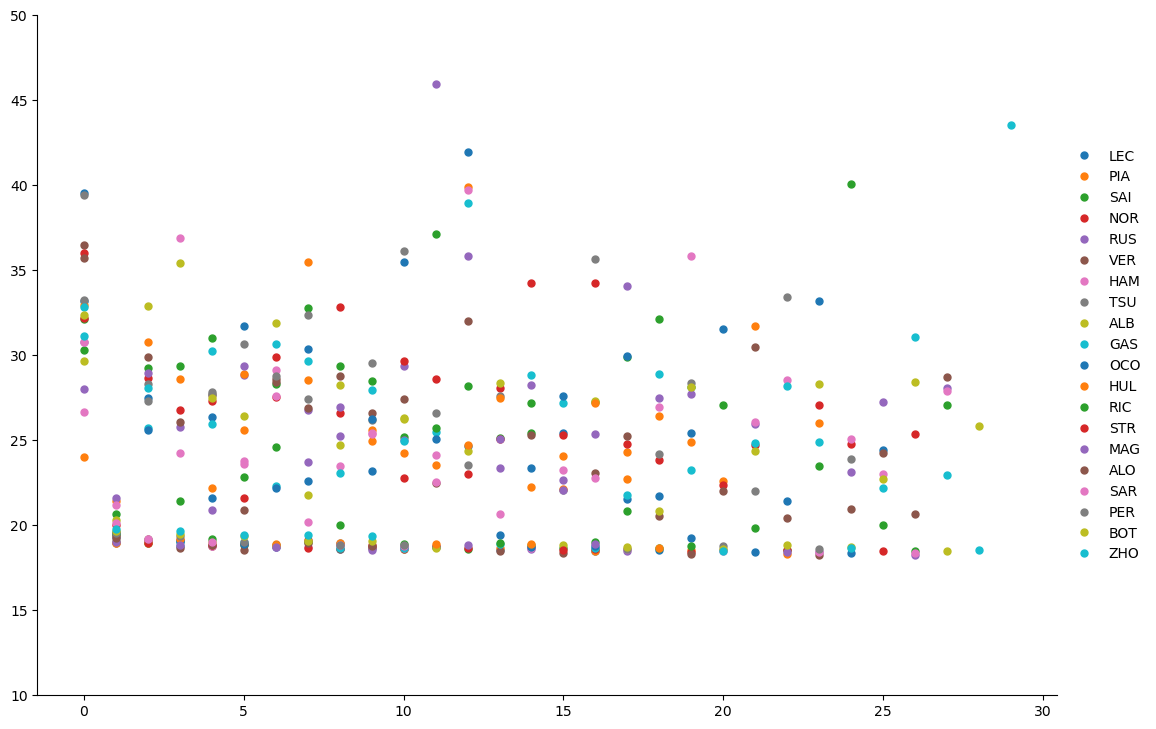

In [97]:
df_laps = session.laps

fig = plt.figure(figsize=(12,8))
ax = plt.axes([0.05, 0.05, 0.85, 0.85])
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim([10, 50])

best_sector1 = []

for i, idriver in enumerate(drivers_names):

    df_temp =  df_laps[df_laps['Driver']==idriver][['Sector1Time', 'Sector2Time', 'Sector3Time']]
    df_temp['Sector1TimeSeconds'] = df_temp['Sector1Time'].apply(lambda x: x.total_seconds())
    
    data_sector1 = df_temp['Sector1TimeSeconds']

    best_sector1.append(np.min(data_sector1))

    x_data = np.arange(len(data_sector1))
    ax.plot(x_data, data_sector1, label=idriver, ls='-', marker='.', markersize=10, lw=0)
    ax.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))



#df_temp

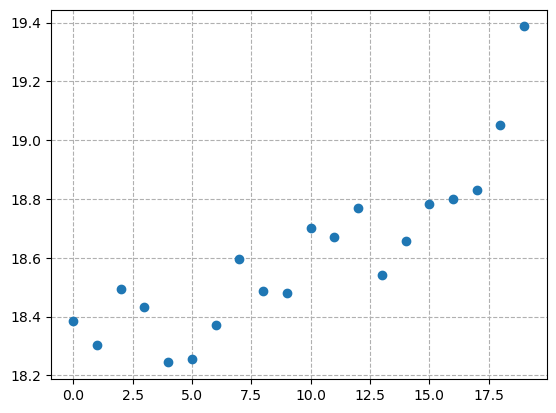

In [102]:
plt.figure(1)
plt.plot(best_sector1,'o')
plt.grid(linestyle='--')

In [103]:
print(drivers_names)

16    LEC
81    PIA
55    SAI
4     NOR
63    RUS
1     VER
44    HAM
22    TSU
23    ALB
10    GAS
31    OCO
27    HUL
3     RIC
18    STR
20    MAG
14    ALO
2     SAR
11    PER
77    BOT
24    ZHO
Name: Abbreviation, dtype: object
